In [33]:
import numpy as np
import pandas as pd
import os

import skimage.io as io
from skimage import util

from glob import glob
from skimage import measure
from skimage.segmentation import clear_border

In [34]:
def img_compare(img_dict):
    n_figures=len(img_dict)
    
    fig, ax = plt.subplots(1,n_figures,figsize=(5*n_figures, 5))
    counter=0
    for label in img_dict:
        img=img_dict[label]
        ax[counter].imshow(img[0:500,0:500])
        ax[counter].set_title(label)
        ax[counter].axis('off')
        counter=counter+1
        

# Outsu Thresholding

In [64]:
def outsu_threshold(file_name):
    from skimage.filters import threshold_otsu
    """
    create list of images that used for multiprocessing
    """ 
    
    folder_to_save=os.path.split(file_name)[0]
    file_prefix=os.path.split(file_name)[1].split('.')[0]
    images_prepared=io.imread(file_name)
    
    images_binary=np.zeros_like(images_prepared,dtype=np.ubyte)
    threshold=threshold_otsu(images_prepared)
    images_binary[images_prepared>threshold]=255
    
    ### clear objects toutching the boader
    for frame in range(images_binary.shape[0]):
        images_binary[frame]=clear_border(images_binary[frame])
    
    io.imsave(os.path.join(folder_to_save,file_prefix+"_segmented.tif"),images_binary)
    img_dict={"img":images_prepared,"binary":images_binary}
    
    return img_dict,file_prefix,threshold

In [65]:
file_list=glob("../data/*_Dark_prepared.tif")
file_list

['../data/43125_Dark_prepared.tif',
 '../data/43121_Dark_prepared.tif',
 '../data/43122_Dark_prepared.tif',
 '../data/43123_Dark_prepared.tif']

In [66]:
thresholds=[]

for file_name in file_list:
    img_dict,file_prefix,threshold=outsu_threshold(file_name)
    thr_dict={"file":file_name,"threshold":threshold}
    thresholds.append(thr_dict)
    
Thresholds=pd.DataFrame(thresholds)
Thresholds.to_csv("../data/Thresholds.csv")

/Users/pichugina/anaconda3/envs/omeropy/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: ../data/43121_Dark_prepared_segmented.tif is a low contrast image


In [68]:
Thresholds

,file,threshold
0,../data/43125_Dark_prepared.tif,0.029752
1,../data/43121_Dark_prepared.tif,0.030297
2,../data/43122_Dark_prepared.tif,0.030835
3,../data/43123_Dark_prepared.tif,0.030650


In [75]:
images_binary=img_dict['binary']
images=img_dict['img']

In [76]:
img_dict.keys()

dict_keys(['img', 'binary'])

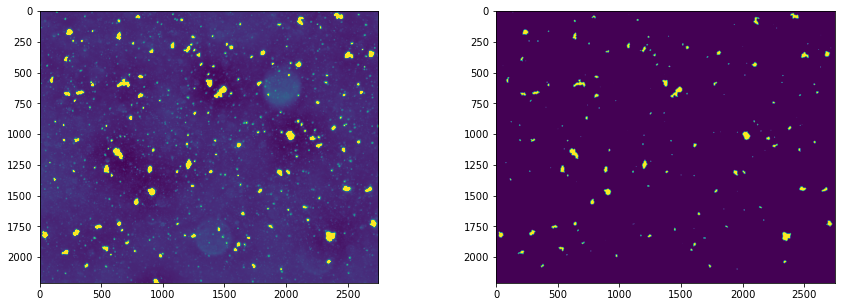

In [77]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
frame=10
ax[0].imshow(images[frame],vmax=0.02)
ax[1].imshow(images_binary[frame])